<a href="https://colab.research.google.com/github/sangeetakar/New/blob/main/Skin(Binary%20Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sangeetakar/psoriasis-vs-basal-cell

100% 1.11G/1.11G [00:55<00:00, 22.4MB/s]
100% 1.11G/1.11G [00:55<00:00, 21.3MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/psoriasis-vs-basal-cell.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
 #Generators provided by Keras to reduce load on RAM
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Psoriasis vs Basal Cell/train',
    labels='inferred',
    label_mode='int', #BCC will be assigned 0
    batch_size=32,
    image_size=(256,256)
)

validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Psoriasis vs Basal Cell/test',
    labels='inferred',
    label_mode='int', #BCC will be assigned 0
    batch_size=32,
    image_size=(256,256)
)

Found 2900 files belonging to 2 classes.
Found 1418 files belonging to 2 classes.


In [7]:
#Normalise
#Images stored in form of Numpy Array .Numpy array has value 0-255, but we need values from 0-1

def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
#Creating a CNN model
#3 convolution filters , 32->64->128 filters

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) #Adding this to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 253, 253, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 251, 251, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 251, 251, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds) #There are 18 batches .625*32 =no of samples

Epoch 1/10
91/91 [==============================] - 37s 383ms/step - loss: 14.2091 - accuracy: 0.8824 - val_loss: 46.6871 - val_accuracy: 0.5176
Epoch 2/10
91/91 [==============================] - 34s 360ms/step - loss: 8.6734 - accuracy: 0.9224 - val_loss: 73.9288 - val_accuracy: 0.5212
Epoch 3/10
91/91 [==============================] - 35s 361ms/step - loss: 7.4016 - accuracy: 0.9352 - val_loss: 84.5991 - val_accuracy: 0.5205
Epoch 4/10
91/91 [==============================] - 31s 330ms/step - loss: 4.1896 - accuracy: 0.9448 - val_loss: 30.0483 - val_accuracy: 0.7370
Epoch 5/10
91/91 [==============================] - 34s 364ms/step - loss: 2.1379 - accuracy: 0.9597 - val_loss: 19.4936 - val_accuracy: 0.8315
Epoch 6/10
91/91 [==============================] - 34s 361ms/step - loss: 2.5039 - accuracy: 0.9621 - val_loss: 36.5081 - val_accuracy: 0.7750
Epoch 7/10
91/91 [==============================] - 31s 329ms/step - loss: 1.3288 - accuracy: 0.9700 - val_loss: 10.5118 - val_accuracy

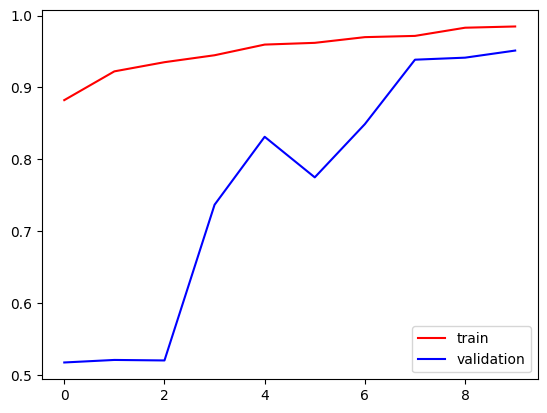

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#BEFORE (first layer 1 stride and others 2 stride and 10 epoch)

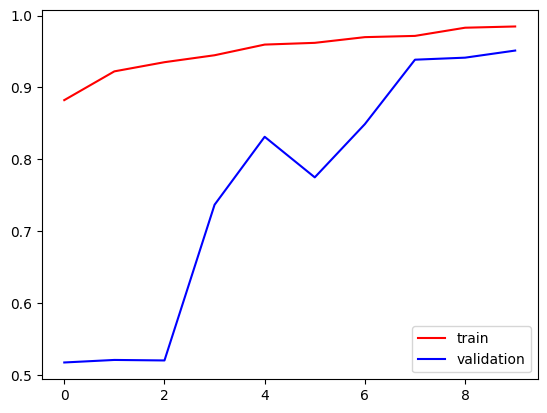

In [14]:
#after changing stride of first layer to 1
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


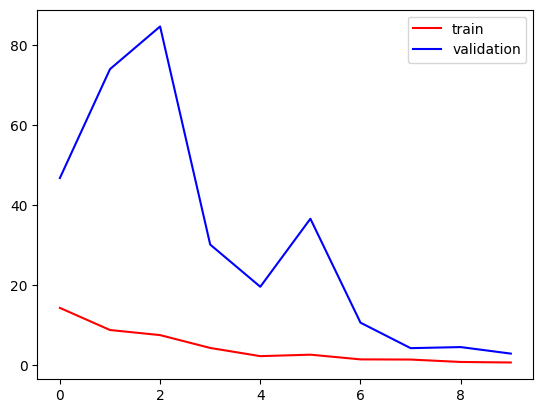

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
import cv2

In [153]:
test_img = cv2.imread('/content/Guttate_psoriasis.jpg')

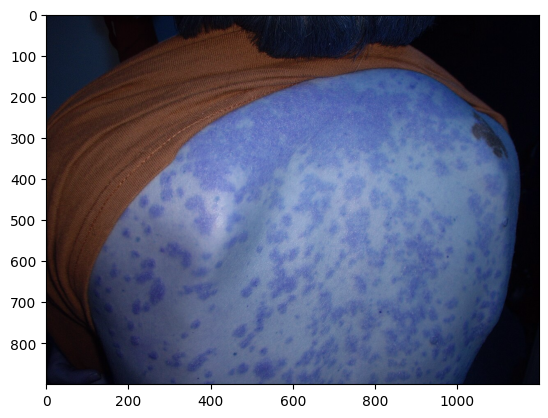

In [154]:
plt.imshow(test_img)

In [155]:
test_img.shape

(900, 1200, 3)

In [156]:
test_img = cv2.resize(test_img,(256,256))

In [157]:
test_input = test_img.reshape((1,256,256,3))

In [158]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)